# Representation of the SIRD data obtained

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display
import datetime as dt

In [2]:
# Loading SIRD final table for Spain
df = pd.read_csv('SIRD_Spain.csv')
df

,ISO_code,Continent,Country/Region,Date,Susceptibles Smooth (S),Infected Smooth (I),Recovered Smooth (R),Deaths Smooth (D),Total Population (N),Total Population Without Deahts (N Alive)
0,ESP,Europe,Spain,2020-01-28,4.733261e+07,0.000000,0.000000e+00,0.000000,47332614.0,4.733261e+07
1,ESP,Europe,Spain,2020-01-29,4.733261e+07,0.000000,0.000000e+00,0.000000,47332614.0,4.733261e+07
2,ESP,Europe,Spain,2020-01-30,4.733261e+07,0.000000,0.000000e+00,0.000000,47332614.0,4.733261e+07
3,ESP,Europe,Spain,2020-01-31,4.733261e+07,0.000000,0.000000e+00,0.000000,47332614.0,4.733261e+07
4,ESP,Europe,Spain,2020-02-01,4.733261e+07,0.142857,0.000000e+00,0.000000,47332614.0,4.733261e+07
...,...,...,...,...,...,...,...,...,...,...
782,ESP,Europe,Spain,2022-03-20,3.596521e+07,217216.000000,1.104677e+07,103418.857143,47332614.0,4.722920e+07
783,ESP,Europe,Spain,2022-03-21,3.595083e+07,208981.428571,1.106931e+07,103500.000000,47332614.0,4.722911e+07
784,ESP,Europe,Spain,2022-03-22,3.593386e+07,208352.000000,1.108681e+07,103591.000000,47332614.0,4.722902e+07
785,ESP,Europe,Spain,2022-03-23,3.591690e+07,207272.000000,1.110476e+07,103682.000000,47332614.0,4.722893e+07


In [3]:
# Obtaining dates and SIRD smooth data
dates = df['Date'].values
S = df['Susceptibles Smooth (S)'].values
I = df['Infected Smooth (I)'].values
R = df['Recovered Smooth (R)'].values
D = df['Deaths Smooth (D)'].values

len(dates), len(S), len(I), len(R), len(D), dates[0:5], S[0:5], I[0:5], R[0:5], D[0:5]

(787,
 787,
 787,
 787,
 787,
 array(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
        '2020-02-01'], dtype=object),
 array([47332614.        , 47332614.        , 47332614.        ,
        47332614.        , 47332613.85714286]),
 array([0.        , 0.        , 0.        , 0.        , 0.14285714]),
 array([0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0.]))

In [4]:
# Transform 'Date' string format
date_label = []
for i in range(0, len(dates), 1):
    date = dt.datetime.strptime(dates[i],'%Y-%m-%d').date()
    date_label.append(date.strftime('%d/%m/%y')) 

len(date_label), date_label[0:5]

(787, ['28/01/20', '29/01/20', '30/01/20', '31/01/20', '01/02/20'])

In [5]:
# Function to plot S(t)
def plot_S(S, date_label):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.plot(date_label, S, linewidth = 2, color = 'cornflowerblue')
    plt.ylabel('Nº Susceptibles', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    plt.suptitle('(a) España - S(t)', y = 0, x = 0.53, size = 'large')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label)+10)
    
    # Saving plot
    name_file = 'Spain_S.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

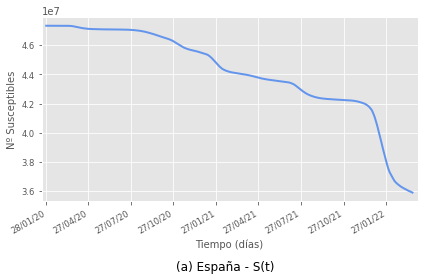

In [6]:
plot_S(S, date_label)

In [7]:
# Function to plot I(t)
def plot_I(I, date_label):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.plot(date_label, I, linewidth = 2, color = 'darkorange')
    plt.ylabel('Nº Infectados Activos', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    plt.suptitle('(b) España - I(t)', y = 0, x = 0.54, size = 'large')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label)+10)
    
    # Saving plot
    name_file = 'Spain_I.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

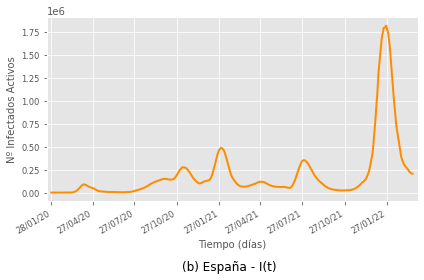

In [8]:
plot_I(I, date_label)

In [9]:
# Function to plot R(t)
def plot_R(R, date_label):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.plot(date_label, R, linewidth = 2, color = 'yellowgreen')
    plt.ylabel('Nº Recuperados', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    plt.suptitle('(c) España - R(t)', y = 0, x = 0.535, size = 'large')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label)+10)
    
    # Saving plot
    name_file = 'Spain_R.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

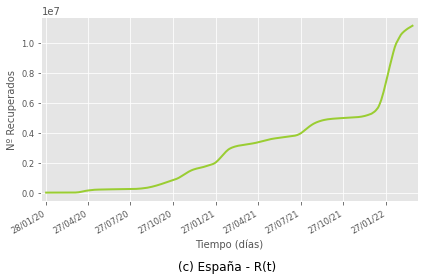

In [10]:
plot_R(R, date_label)

In [11]:
# Function to plot R(t)
def plot_D(D, date_label):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.plot(date_label, D, linewidth = 2, color = 'crimson')
    plt.ylabel('Nº Fallecidos', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    plt.suptitle('(d) España - D(t)', y = 0, x = 0.555, size = 'large')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label)+10)
    
    # Saving plot
    name_file = 'Spain_D.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

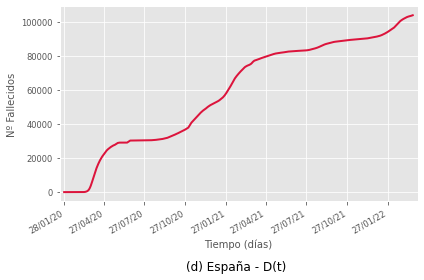

In [12]:
plot_D(D, date_label)